In [36]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
train_dir = r"../input/gender-classification-dataset/Training"
val_dir =r"../input/gender-classification-dataset/Validation"
CATEGORIES = ["male","female"]

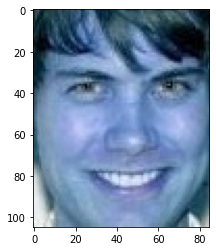

In [38]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [39]:
img_array.shape

(105, 85, 3)

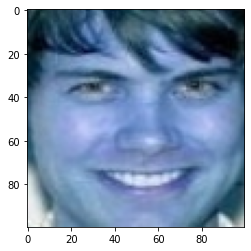

In [40]:
IMG_SIZE= (100)

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [41]:
train_data = []
val_data = []

def get_data(directory, list_dir):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                list_dir.append([new_array, class_num])
            except Exception as e:
                pass
get_data(train_dir,train_data)
get_data(val_dir,val_data)

In [42]:
len(train_data), len(val_data)

(47009, 11649)

In [43]:
import random

random.shuffle(train_data)
random.shuffle(val_data)

In [44]:
import numpy as np

X_train = []
y_train = []
X_val = []
y_val = []

def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])
                          
split_train_test(train_data, X_train,y_train)
split_train_test(val_data, X_val,y_val)

In [45]:
X_train = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
X_val= np.array(X_val).reshape(-1,IMG_SIZE, IMG_SIZE,1)


y_train = np.array(y_train)
y_val = np.array(y_val)

In [46]:
X_train.shape

(47009, 100, 100, 1)

In [47]:
from sklearn.model_selection import train_test_split

val_x,X_test,val_y,y_test = train_test_split(X_val,y_val,test_size=0.5)

In [48]:
X_test.shape

(5825, 100, 100, 1)

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

In [50]:
model = models.Sequential([
    
  layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)),
  layers.MaxPooling2D((2,2)),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
    
  layers.Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(60, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(val_x, val_y))  

Epoch 1/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.1648 - accuracy: 0.9414 - val_loss: 0.1386 - val_accuracy: 0.9538
Epoch 2/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.1453 - accuracy: 0.9487 - val_loss: 0.1272 - val_accuracy: 0.9562
Epoch 3/10
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1356 - accuracy: 0.9528 - val_loss: 0.1227 - val_accuracy: 0.9574
Epoch 4/10
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1296 - accuracy: 0.9539 - val_loss: 0.1149 - val_accuracy: 0.9641
Epoch 5/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.1260 - accuracy: 0.9564 - val_loss: 0.1188 - val_accuracy: 0.9562
Epoch 6/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.1219 - accuracy: 0.9573 - val_loss: 0.1120 - val_accuracy: 0.9631
Epoch 7/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.1190 - accuracy: 0.9590 - val_loss: 0.1047 - val_ac

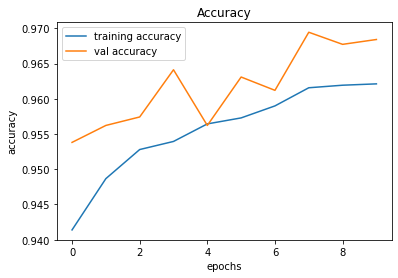

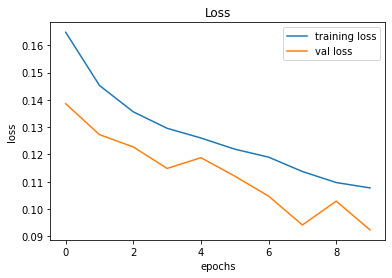

In [53]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [54]:
model.evaluate(X_test,y_test)

183/183 [==============================] - 1s 4ms/step - loss: 0.1000 - accuracy: 0.9633


[0.09996820241212845, 0.9632617831230164]

In [55]:
predictions = model.predict(X_test)
predictions[:5]

array([[0.00145706],
       [0.9982323 ],
       [0.01351696],
       [0.6336222 ],
       [0.9924562 ]], dtype=float32)

In [56]:
predicted = []
for i in predictions:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)
        
predicted[:5]

[0, 1, 0, 1, 1]

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(69.0, 0.5, 'Truth')

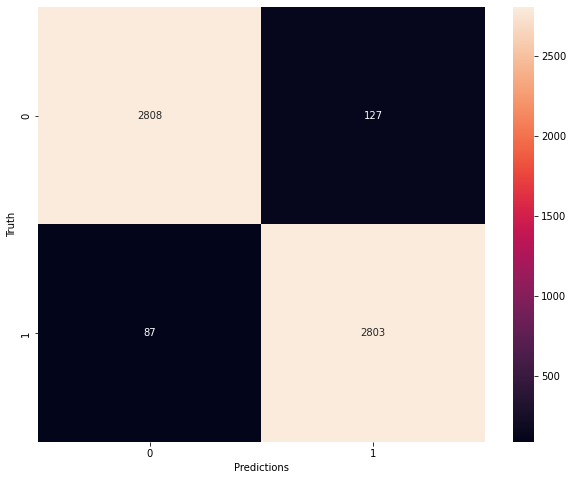

In [58]:
import seaborn as sn

plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [59]:
model.save("male_female_classifier.h5")